In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

import numpy as np

import matplotlib.pyplot as plt
import json

In [2]:
epochs_fields = [epoch for epoch in open('../ROBOT_1_blue|potential_field.log').read().split('||')]
w = 0.750 * 2
h = 0.650 * 2
plt.rcParams["figure.figsize"] = (85/2, 75/2)
font = {'weight': 'bold','size' : 46}

plt.rc('font', **font)
plt.style.use('seaborn-dark-palette')

Widget Javascript not detected.  It may not be installed or enabled properly.


(1.5, 1.3)

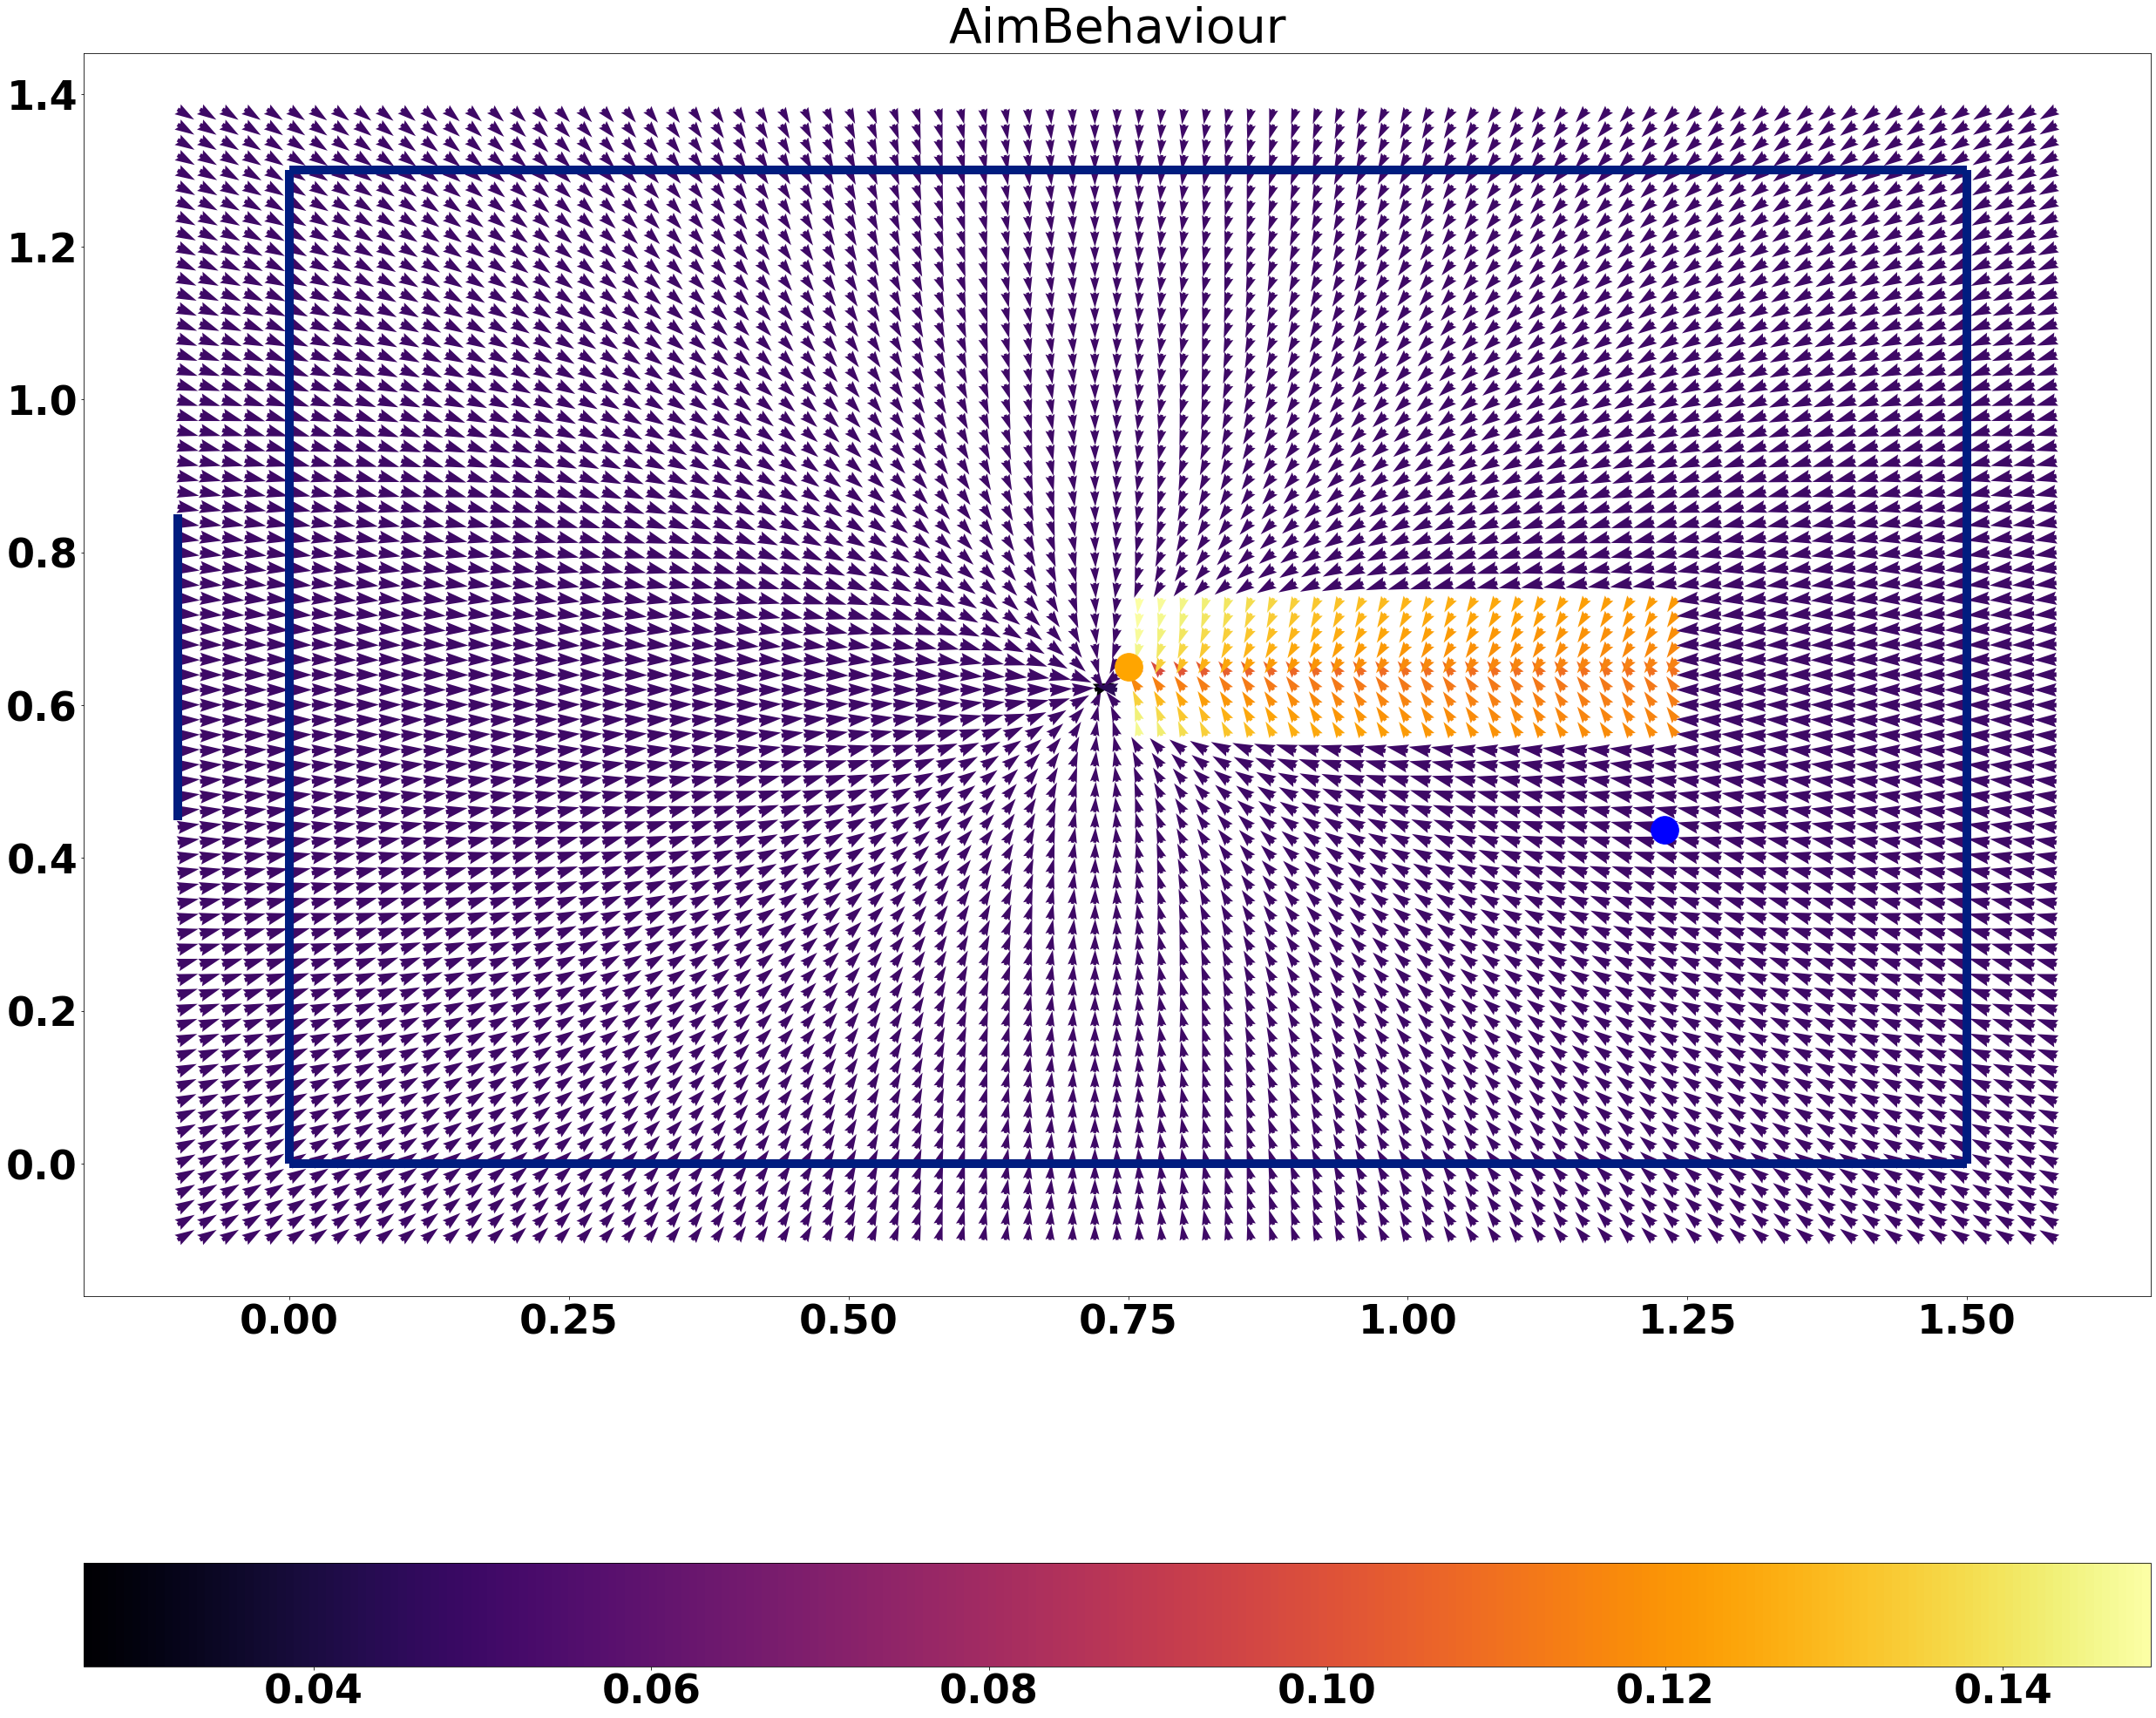

In [4]:
def series(epoch_num):
    epoch_num = min(epoch_num, max(0, len(epochs_fields)-1))
    epoch = json.loads(epochs_fields[epoch_num])
    x = np.array(epoch['x'])
    y = np.array(epoch['y'])
    u = np.array(epoch['u'])
    v = np.array(epoch['v'])
    
    u_norm = [(np.array([a[0], a[1]])/np.linalg.norm([a[0], a[1]]))[0] for a in zip(u, v)]
    v_norm = [(np.array([a[0], a[1]])/np.linalg.norm([a[0], a[1]]))[1] for a in zip(u, v)]
    
    m=np.sqrt(u**2+v**2)
    
    q = plt.quiver(x, y, u_norm, v_norm, m, units='xy', angles='xy', scale_units='xy', scale=50, cmap='inferno')
    plt.scatter(epoch['robot_x'], epoch['robot_y'], c='blue', s=1000)
    plt.scatter(epoch['ball_x'], epoch['ball_y'], c='orange', s=1000)
    
    plt.vlines(0, 0, h,linewidth=10.0)
    plt.vlines(w, 0, h,linewidth=10.0)
    plt.hlines(0, 0, w,linewidth=10.0)
    plt.hlines(h, 0, w,linewidth=10.0)
    plt.vlines(-0.1, h/2 - 0.2, h/2 + 0.2,linewidth=10.0)
    plt.title(epoch['behaviour'])
    
    plt.colorbar(q, orientation="horizontal")
    return()

interact(series, epoch_num= (0, len(epochs_fields)-2, 1) )
w, h